# An example Jupyter Notebook

This notebook is a demonstration of directly-parsing Jupyter Notebooks into
Sphinx using the MyST parser.[^download]

[^download]: This notebook can be downloaded as
            **{nb-download}`basic.ipynb`** and {download}`basic.md`

## Markdown


### Configuration

The MyST-NB parser derives from [the base MyST-Parser](myst:intro/get-started), and so all the same configuration options are available.
See the [MyST configuration options](myst:sphinx/config-options) for the full set of options, and [MyST syntax guide](myst:example_syntax) for all the syntax options.

To build documentation from this notebook, the following options are set:

```python
myst_enable_extensions = [
    "amsmath",
    "colon_fence",
    "deflist",
    "dollarmath",
    "html_image",
]
myst_url_schemes = ("http", "https", "mailto")
```

### Syntax

As you can see, markdown is parsed as expected. Embedding images should work as expected.
For example, here's the MyST-NB logo:

```md
![myst-nb logo](../_static/logo-wide.svg)
```

![myst-nb logo](../_static/logo-wide.svg)

By adding `"html_image"` to the `myst_enable_extensions` list in the sphinx configuration ([see here](myst:syntax/images)), you can even add HTML `img` tags with attributes:

```html
<img src="../_static/logo-wide.svg" alt="logo" width="200px" class="shadow mb-2">
```

<img src="../_static/logo-wide.svg" alt="logo" width="200px"  class="shadow mb-2">

Because MyST-NB is using the MyST-markdown parser, you can include rich markdown with Sphinx in your notebook.
For example, here's a note admonition block:

:::::{note}
**Wow**, a note!
It was generated with this code ([as explained here](myst:syntax/admonitions)):

````md
:::{note}
**Wow**, a note!
:::
````

:::::

If you wish to use "bare" LaTeX equations, then you should add `"amsmath"` to the `myst_enable_extensions` list in the sphinx configuration.
This is [explained here](myst:syntax/amsmath), and works as such:

```latex
\begin{equation}
\frac {\partial u}{\partial x} + \frac{\partial v}{\partial y} = - \, \frac{\partial w}{\partial z}
\end{equation}

\begin{align*}
2x - 5y &=  8 \\
3x + 9y &=  -12
\end{align*}
```

\begin{equation}
\frac {\partial u}{\partial x} + \frac{\partial v}{\partial y} = - \, \frac{\partial w}{\partial z}
\end{equation}

\begin{align*}
2x - 5y &=  8 \\
3x + 9y &=  -12
\end{align*}

Also you can use features like **equation numbering** and referencing in the notebooks:

```md
$$e^{i\pi} + 1 = 0$$ (euler)
```

$$e^{i\pi} + 1 = 0$$ (euler)

Euler's identity, equation {math:numref}`euler`, was elected one of the
most beautiful mathematical formulas.

You can see the syntax used for this example [here in the MyST documentation](myst:syntax/math).

## Code cells and outputs

You can run cells, and the cell outputs will be captured and inserted into
the resulting Sphinx site.

### `__repr__` and HTML outputs

For example, here's some simple Python:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.rand(3, 100) * 100
data[:, :10]

array([[8.70814753e+01, 1.28256340e+01, 5.31478764e+01, 8.73684116e+01,
        8.47540425e+01, 5.92312821e+00, 2.82501961e+01, 5.54039058e+01,
        4.52093253e+01, 8.07084772e+01],
       [7.69888173e+01, 8.74656230e+00, 7.35296321e+01, 7.68600517e+01,
        5.07475169e+00, 9.75757895e+00, 6.48012476e+01, 8.03287879e+01,
        1.57012589e+01, 6.90048157e+01],
       [3.82642391e+01, 9.89656295e+00, 4.52316892e-02, 7.34026011e+00,
        8.27162719e+01, 1.36139893e+01, 6.94663105e+01, 3.56781385e+01,
        2.98450339e+01, 8.93285331e+01]])

This will also work with HTML outputs

In [2]:
import pandas as pd
df = pd.DataFrame(data.T, columns=['a', 'b', 'c'])
df.head()

a          b          c
0  87.081475  76.988817  38.264239
1  12.825634   8.746562   9.896563
2  53.147876  73.529632   0.045232
3  87.368412  76.860052   7.340260
4  84.754042   5.074752  82.716272

as well as math outputs

In [3]:
from IPython.display import Math
Math(r"\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}")

<IPython.core.display.Math object>

This works for error messages as well:

In [4]:
print("This will be properly printed...")
print(thiswont)

This will be properly printed...


NameError: name 'thiswont' is not defined

### Images

Images that are generated from your code (e.g., with Matplotlib) will also
be embedded.

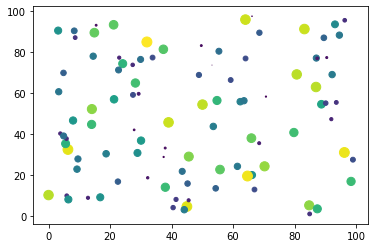

In [5]:
fig, ax = plt.subplots()
ax.scatter(*data, c=data[2])